# Introduction to Neural Networks using Keras

The aim of this project is to make a basic Digit classifier using the most famous Mnist Database. The idea is to teach myself basic concepts of Neural Network.


In [1]:
# Importing basic package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

C:\Users\aradh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing keras related package
from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split

In [75]:
df=pd.read_csv('C:\\python\\study\dataset\\digit recogniser\\train.csv') # Loading Data

# Understanding Data

In [76]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df.shape, np.sqrt(784)

((42000, 785), 28.0)

It seems first column is label and the whole (28x28) pixel is flattened and inserted into individual rows. I will be try to reshape first few rows and visualise using matplotlib.


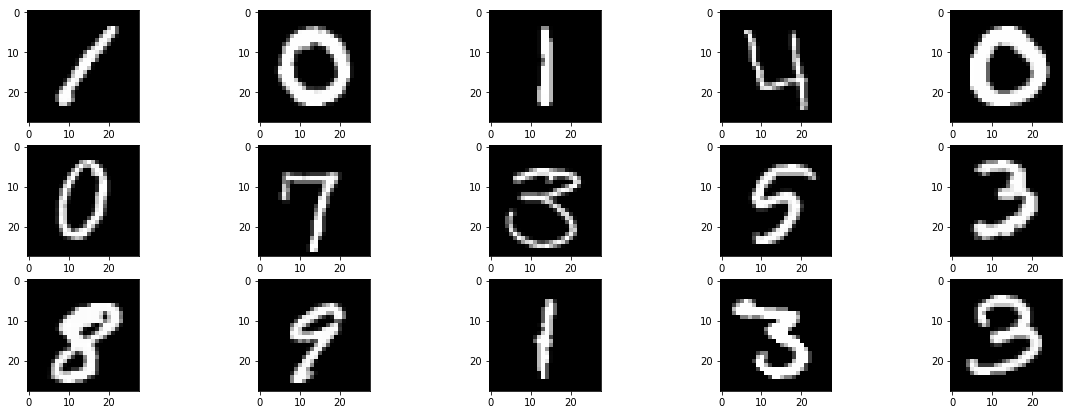

In [78]:
plt.figure(figsize=(20,7))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(df.iloc[i,1:].values.reshape(28,28),cmap='gray')

# Preparing Data

Extract labels out 

In [134]:
y=df.label
X=df.iloc[:,1:]

In [135]:
y=pd.get_dummies(y) # One hot encoding of labels
y.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


We see it matches with images displayed by matplotlib.

In [136]:
#X=X/255.0 # standardising data
#X=(X- np.mean(X))/np.std(X)

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
st=StandardScaler()
X=st.fit_transform(X)

In [221]:
train_x,test_x,train_y,test_y=train_test_split(X,y)

In [222]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((31500, 784), (10500, 784), (31500, 10), (10500, 10))

# Creating Model

In [145]:
model=Sequential()

It is a sequential model so we create the model as an object of Sequential class. Dense is fully connected layer that means all neurons in previous layers will be connected to all neurons in fully connected layer. First hidden layer takes input from the input layer so we define input_dim as the number of features. Similarly the last layer is the output layer hence we need to give it the output dimension.

The activation function used is relu, which stands for Rectified Linear Unit. for inputs less than Zero it gives output Zero, for inputs greater than zero it returns the input as output.

In [146]:
model.add(Dense(50,input_dim=train_x.shape[1],activation='relu')) # Adding first  hidden layer

In [147]:
model.add(Dense(50,activation='relu')) #Adding hidden second Layer

In [179]:
model.add(Dense(output_dim=10,activation='softmax')) # Adding output  layer

Softmax function gives probability of different digits. (i.e. 1 to 10). The output with highest probability is selected and the corresponding Digit can be extracted using Argmax function.
Adam optimizer's full form is Adaptive moment estimation. This in cormporates the RmsProp optimisation and optimisation with momentum. Usually it is said to generalise well. The RmsProp and Momentum optimisation in itself way to reduce overfitting by changing weight update rule by incorporating a exponentially weighted average of the gradient.

In [149]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [150]:
model.fit(train_x,train_y,batch_size=64,epochs=15)

Epoch 1/15
31500/31500 [==============================] - 8s 239us/step - loss: 0.4434 - acc: 0.8744
Epoch 2/15
31500/31500 [==============================] - 6s 201us/step - loss: 0.1954 - acc: 0.9421
Epoch 3/15
31500/31500 [==============================] - ETA: 0s - loss: 0.1437 - acc: 0.957 - 6s 205us/step - loss: 0.1436 - acc: 0.9579
Epoch 4/15
31500/31500 [==============================] - 7s 227us/step - loss: 0.1132 - acc: 0.9670
Epoch 5/15
31500/31500 [==============================] - 7s 226us/step - loss: 0.0937 - acc: 0.9715
Epoch 6/15
31500/31500 [==============================] - 7s 225us/step - loss: 0.0781 - acc: 0.9765
Epoch 7/15
31500/31500 [==============================] - 7s 227us/step - loss: 0.0669 - acc: 0.9800
Epoch 8/15
31500/31500 [==============================] - 7s 220us/step - loss: 0.0570 - acc: 0.9821
Epoch 9/15
31500/31500 [==============================] - 9s 293us/step - loss: 0.0486 - acc: 0.9856
Epoch 10/15
31500/31500 [============================

In [244]:
from sklearn.metrics import accuracy_score
import seaborn as sns

In [219]:
test_x.shape

(10500, 28, 28, 1)

In [242]:
y_pred=model.predict(test_x)

In [243]:
accuracy_score(np.argmax(y_pred,axis=1),np.argmax(test_y.values,axis=1))

0.9876190476190476

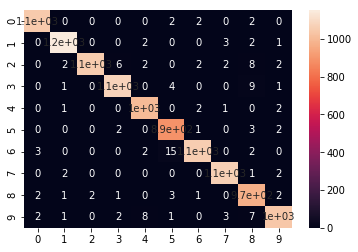

In [249]:
sns.heatmap(confusion_matrix(np.argmax(y_pred,axis=1),np.argmax(test_y.values,axis=1)),annot=True)

The most mistake it has commited is to classify 6 as 5

# Convolutional Neural Network

In [157]:
from keras.layers import  Flatten, Conv2D, MaxPool2D

In [250]:
train_x = train_x.values.reshape(train_x.shape[0], 28, 28,1)

In [251]:
test_x = test_x.values.reshape(test_x.shape[0], 28, 28,1)

In [252]:
conv_model=Sequential()

In [253]:
conv_model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape = (28,28,1)))
conv_model.add(Conv2D(32,(3,3),activation='relu'))
conv_model.add(MaxPool2D(pool_size=(2,2)))
conv_model.add(Dropout(.2))


In [254]:
conv_model.add(Conv2D(64,(3,3),activation='relu'))
conv_model.add(MaxPool2D(pool_size=(2,2)))
conv_model.add(Dropout(.2))


conv_model.add(Flatten())
conv_model.add(Dense(256, activation = "relu"))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(10, activation = "softmax"))

In [255]:
conv_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [256]:
conv_model.fit(train_x,train_y,batch_size=64,epochs=5)

Epoch 1/5
31500/31500 [==============================] - 238s 8ms/step - loss: 0.2827 - acc: 0.9099
Epoch 2/5
31500/31500 [==============================] - 207s 7ms/step - loss: 0.0869 - acc: 0.9737
Epoch 3/5
31500/31500 [==============================] - 196s 6ms/step - loss: 0.0629 - acc: 0.9811
Epoch 4/5
31500/31500 [==============================] - 199s 6ms/step - loss: 0.0537 - acc: 0.9838
Epoch 5/5
31500/31500 [==============================] - 198s 6ms/step - loss: 0.0458 - acc: 0.9852


In [257]:
y_pred_conv=conv_model.predict(test_x)

In [258]:
accuracy_score(np.argmax(y_pred_conv,axis=1),np.argmax(test_y.values,axis=1))

0.9895238095238095

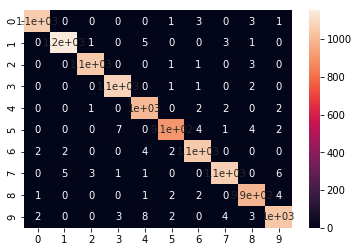

In [259]:
sns.heatmap(confusion_matrix(np.argmax(y_pred_conv,axis=1),np.argmax(test_y.values,axis=1)),annot=True)

Better than simple Neural Network model